# Chinook Music Store Sales

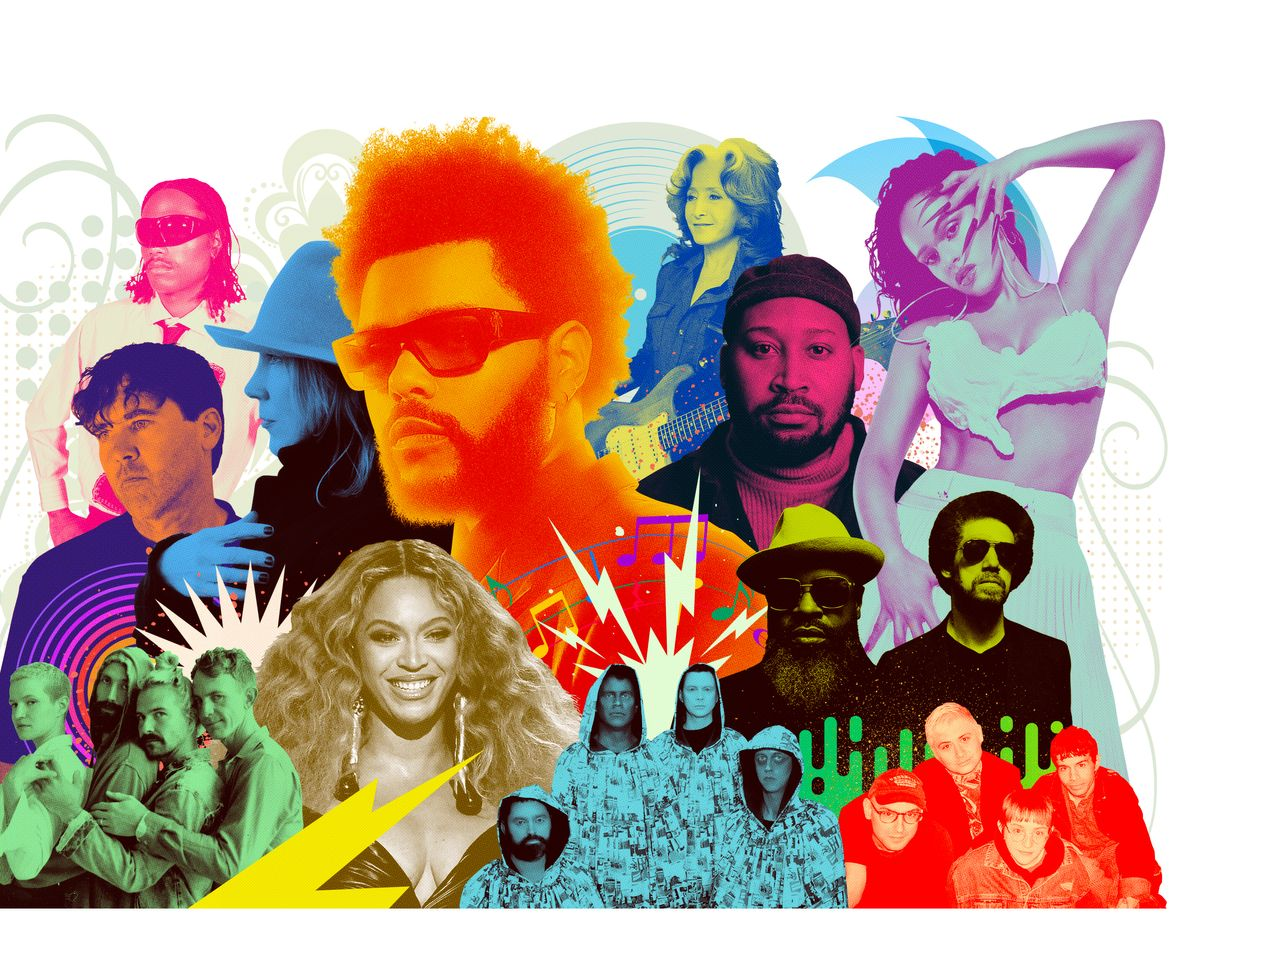



## Introduction

For this project, we will be using the sample [Chinook database](https://github.com/lerocha/chinook-database#:~:text=Chinook%20Database,single%20and%20multiple%20database%20servers) to answer a few hypothetical business questions. 

The hypothetical business setup is that the Chinook record store has signed a deal with a new record label, and we have been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

**Artist Name** / **Genre**
* Regal / Hip-Hop
* Red Tone / Punk
* Meteor and the Girls / Pop
* Slim Jim Bites / Blues

A schema of the database is provided below

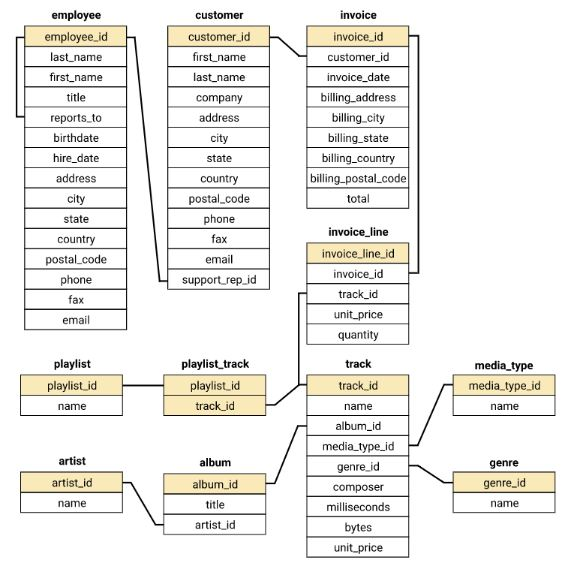

## Goals

1) Analyze sales by genres in the USA, to make a recommendation for which 3 albums to select to sell at the store

2) Analyze sales by Employee Sales Performance

3) Analyze sales by country, to make a recommendation on which country to spend advertising dollars on

4) Comparing sales performance between album versus tracks 

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [2]:
%%sql
--check table names

SELECT 
    name 
FROM sqlite_schema 
WHERE type='table' 
ORDER BY name

 * sqlite:///chinook.db
Done.


name
album
artist
customer
employee
genre
invoice
invoice_line
media_type
playlist
playlist_track


# Which Genre sells best in the USA?
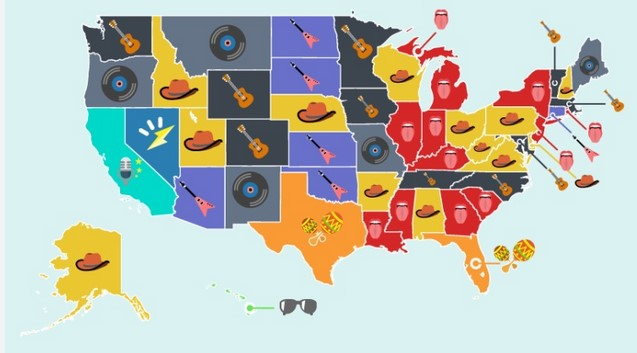

To answer this questions we will perform the following steps:
- Inspect the types of genres
- Perform a couple of joins through `track`, `invoice_line`,`invoice`, and `customer` tables
- Filter `country` for only `USA`
- Count how many tracks are sold per genre in USA

In [3]:
%%sql
SELECT *
    FROM genre

 * sqlite:///chinook.db
Done.


genre_id,name
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll
6,Blues
7,Latin
8,Reggae
9,Pop
10,Soundtrack


In [4]:
%%sql

WITH USA_tracks AS
(    SELECT 
        c.country AS country,
        g.genre_id AS genre_id,
        g.name AS genre_name,
        t.track_id AS track_id
    FROM track AS t
    LEFT JOIN invoice_line AS il ON il.track_id = t.track_id
    LEFT JOIN invoice AS i ON i.invoice_id = il.invoice_id
    LEFT JOIN customer AS c ON c.customer_id = i.customer_id
    LEFT JOIN genre AS g ON g.genre_id = t.genre_id
    WHERE country = 'USA'
)


SELECT 
    country,
    genre_id,
    genre_name,
    COUNT(track_id) AS tracks_sold,
    ROUND((CAST(COUNT(track_id) AS float)/ 
           (SELECT COUNT(*)
            FROM USA_tracks) *100),2) AS percentage_sold_USA
FROM USA_tracks as ust
GROUP BY ust.genre_name
ORDER BY tracks_sold DESC


 * sqlite:///chinook.db
Done.


country,genre_id,genre_name,tracks_sold,percentage_sold_USA
USA,1,Rock,561,53.38
USA,4,Alternative & Punk,130,12.37
USA,3,Metal,124,11.8
USA,14,R&B/Soul,53,5.04
USA,6,Blues,36,3.43
USA,23,Alternative,35,3.33
USA,9,Pop,22,2.09
USA,7,Latin,22,2.09
USA,17,Hip Hop/Rap,20,1.9
USA,2,Jazz,14,1.33


# Observations

We can see the top 3 genres that are sold in the USA are `Rock` 53%, `Alternative & Punk` 12% and `Metal` 11.8% with a whopping 53% in `Rock`. 

Since our consideration for the new albums are in the genre of `Hip-Hop`, `Punk`, `Pop` and `Blues`, we can see that `Red Tone` - `Punk` would be our top choice, followed by `Slim Jim Bites` - `Blues` (3.4%) and `Meteor and the Girls` - `Pop` (2%). 
____

# Analyzing Employee Sales Performance

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. We will analyze the purchases of customers belonging to each `sales support agent` employee to see if any sales support agent is performing either better or worse than the others by the total dollar amount of sales assigned to each sales support agent.

In [5]:
%%sql
SELECT *
FROM employee

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


From `employee` table, we will select basic columns `employee id`, `last_name`, `first_name`, `title` as well as `birthdate` and `hire_date` that may give us some profile on the employee like their age and how long have they been with Chinook.

We will then join `employee` table to `customer` and `invoice` tables to find out total sales amount for each sales support agent employee.

In [6]:
%%sql
WITH sales_support_agent AS
(
    SELECT 
        employee_id,
        first_name || " " || last_name AS employee_name,
        title,
        birthdate,
        hire_date
    FROM employee
    WHERE title = "Sales Support Agent"
)

SELECT
    ssa.employee_id,
    ssa.employee_name,
    ssa.title,
    ssa.birthdate,
    ssa.hire_date, 
    SUM(i.total) AS total_sales
FROM sales_support_agent as ssa
LEFT JOIN customer AS c ON c.support_rep_id = ssa.employee_id
LEFT JOIN invoice AS i ON i.customer_id = c.customer_id
GROUP BY 2
ORDER BY total_sales DESC

 * sqlite:///chinook.db
Done.


employee_id,employee_name,title,birthdate,hire_date,total_sales
3,Jane Peacock,Sales Support Agent,1973-08-29 00:00:00,2017-04-01 00:00:00,1731.510000000004
4,Margaret Park,Sales Support Agent,1947-09-19 00:00:00,2017-05-03 00:00:00,1584.0000000000032
5,Steve Johnson,Sales Support Agent,1965-03-03 00:00:00,2017-10-17 00:00:00,1393.9200000000028


Employee 3 Jane Peacock has the highest total dollar amount of sales out of the three sales support agents. However because she is hired earlier than the other 2 employees, 6 months earlier than the last employee Steve Johnson who is only clocking 20% lesser in sales, `total_sales` may not be the best yardstick for best performance. Let's compare monthly sales amount by using the `hired_period_months` as `hired_date` to last noted `invoice_date`.


In [7]:
%%sql

--Check latest invoice date
SELECT DISTINCT(invoice_date)
FROM invoice
ORDER BY 1 DESC
LIMIT 5

 * sqlite:///chinook.db
Done.


invoice_date
2020-12-30 00:00:00
2020-12-29 00:00:00
2020-12-27 00:00:00
2020-12-21 00:00:00
2020-12-20 00:00:00


In [8]:
%%sql
--check data type of invoice_date
PRAGMA table_info(invoice);

 * sqlite:///chinook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,invoice_id,INTEGER,1,None,1
1,customer_id,INTEGER,1,None,0
2,invoice_date,DATETIME,1,None,0
3,billing_address,NVARCHAR(70),0,None,0
4,billing_city,NVARCHAR(40),0,None,0
5,billing_state,NVARCHAR(40),0,None,0
6,billing_country,NVARCHAR(40),0,None,0
7,billing_postal_code,NVARCHAR(10),0,None,0
8,total,"NUMERIC(10,2)",1,None,0


In [9]:
%%sql

WITH hire_difference AS (
  SELECT
    employee_id,
    first_name || " " || last_name AS employee_name,
    title,
    birthdate,
    hire_date,
    (JULIANDAY("2020-12-30 00:00:00") - JULIANDAY(hire_date))/30 AS hire_period_months
  FROM employee
)


SELECT
    ssa.employee_id,
    ssa.employee_name,
    ssa.title,
    ssa.birthdate,
    ssa.hire_date, 
    ssa.hire_period_months,
    SUM(i.total) AS total_sales,
    (SUM(i.total)/ssa.hire_period_months) AS sales_per_month
FROM hire_difference as ssa
LEFT JOIN customer AS c ON c.support_rep_id = ssa.employee_id
LEFT JOIN invoice AS i ON i.customer_id = c.customer_id
WHERE ssa.title = 'Sales Support Agent'
GROUP BY 2
ORDER BY sales_per_month DESC



 * sqlite:///chinook.db
Done.


employee_id,employee_name,title,birthdate,hire_date,hire_period_months,total_sales,sales_per_month
3,Jane Peacock,Sales Support Agent,1973-08-29 00:00:00,2017-04-01 00:00:00,45.63333333333333,1731.510000000004,37.94397370343325
5,Steve Johnson,Sales Support Agent,1965-03-03 00:00:00,2017-10-17 00:00:00,39.0,1393.9200000000028,35.74153846153853
4,Margaret Park,Sales Support Agent,1947-09-19 00:00:00,2017-05-03 00:00:00,44.56666666666667,1584.0000000000032,35.542258788332155


# Observations

We see that with monthly performance, while Jane Peacock remains the top salesperson, earning $2 more monthly than the next best employee.
Steve Johnson is actually performing better than Margaret Park even though he has lesser in total sales.
____


# Analyzing Sales by Country

Grouping by country, we will analyse each countries'
1. total sales

2. sales per customer (total sales / total number of customers)

3. average order value (total sales / total number of orders)

In [10]:
%%sql

--check number of customers in customer table
SELECT COUNT(customer_id) AS customer_count
FROM customer

 * sqlite:///chinook.db
Done.


customer_count
59


In [11]:
%%sql

--check number of customers in invoice table
SELECT COUNT(customer_id) AS invoice_customer_count
FROM invoice

 * sqlite:///chinook.db
Done.


invoice_customer_count
614


As the above suggests that `invoice` table have multiple purchases per customer, we will perform the following steps:

- Create an isolated CTE table for calculating total customers group by country from `customer` table. This will avoid double counting `customer_id` if we joined `invoice` table

- Create another CTE table for calculating total sales group by country from `customer` inner join `invoice` table, without aggregating total customers

- Combine both tables and group countries that has only 1 customer together as it is not representative of high sales if it is only bought by 1 customer

- Calculate sales per customer and average order value

In [12]:
%%sql

-- calculate total customers per country
WITH t1 AS (SELECT country, 
                   COUNT(customer_id) AS num_customers
            FROM customer
            GROUP BY 1),

-- calculate total sales per country
    t2 AS (SELECT country,
                   ROUND(SUM(i.total), 2) AS total_sales,
                   ROUND(COUNT(i.invoice_id), 2) AS num_sales
            FROM customer AS c
            INNER JOIN invoice AS i
            ON c.customer_id = i.customer_id
            GROUP BY 1),

-- Group countries with only one customer as 'Others'
    t3 AS (SELECT CASE
                   WHEN t1.num_customers =1 THEN "Others"
                   ELSE t1.country
                   END AS country,
                   SUM(t1.num_customers) AS num_customers,
                   t2.total_sales AS total_sales,
                   t2.num_sales AS num_sales
            FROM t1
            INNER JOIN t2
            ON t1.country = t2.country
            GROUP BY 1)

    
-- Calculate relevant sales metrics

SELECT
    country,
    num_customers,
    total_sales,
    ROUND((total_sales / num_customers), 2) AS per_customer_sales_value,
    ROUND((total_sales / num_sales), 2) AS average_order_value
FROM t3
GROUP BY country
ORDER BY total_sales DESC



 * sqlite:///chinook.db
Done.


country,num_customers,total_sales,per_customer_sales_value,average_order_value
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
Others,15,39.6,2.64,7.92


# Observations

* **Total sales is the highest in USA** followed by Canada and Brazil. 

* However when zooming into per customer sales value and average order value, it appears that **Czech Republic, Portugal and India have a higher per customer/order value**, suggesting there may be opportunity to invest more marketing campaigns to boost sales in these locations. 

It is worth noting though that the sample size for these locations are limiting and not substantial to give us high confidence. A better approach would be to run small campaigns in these countries, collecting and analyzing the new customers to make sure that these trends are hold true with new customers.

____

# Albums vs Individual Tracks

To find out whether albums or individual tracks sell better, let's inspect the relationship between `invoice_id`, `album_id` and `track_id`.


In [13]:
%%sql

--explore track and invoice_line table combined
SELECT il.invoice_id,
       t.album_id,
       t.track_id
FROM invoice_line AS il
LEFT JOIN track AS t 
ON t.track_id = il.track_id
LIMIT 30


 * sqlite:///chinook.db
Done.


invoice_id,album_id,track_id
1,91,1158
1,91,1159
1,91,1160
1,91,1161
1,91,1162
1,91,1163
1,91,1164
1,91,1165
1,91,1166
1,91,1167


We see that there are 3 scenerios for each `invoice_id`:
1. Tracks Only - Customer purchases tracks from different albums (different `track_id`, different `album_id`)
2. Singles Only - Customer purchasing albums with singles(1 `track_id`, 1 `album_id`)
3. Albums Only - Customer purchases albums only (different `track_id`, same `album_id`)

Let's calculate **Tracks Only** purchase amount first by filtering out invoices with *more than 1 `album_id`*. 

In [14]:
%%sql

SELECT i.invoice_id,
       t.album_id, 
       i.total AS tracks_only_total_purchase
FROM invoice as i
INNER JOIN invoice_line as il ON i.invoice_id = il.invoice_id
INNER JOIN track as t ON t.track_id = il.track_id
GROUP BY i.invoice_id
HAVING COUNT(DISTINCT(t.album_id))> 1
LIMIT 10

 * sqlite:///chinook.db
Done.


invoice_id,album_id,tracks_only_total_purchase
2,322,9.9
3,203,1.98
4,314,7.92
6,83,1.98
7,322,10.89
8,183,9.9
9,21,8.91
10,215,1.98
11,211,10.89
12,118,3.96


For **Singles Only**, we will filter out invoices containing *only 1 `album_id` and 1 `track_id`*.

In [15]:
%%sql

SELECT i.invoice_id,
       t.album_id, 
       i.total AS albums_only_total_purchase
FROM invoice as i
INNER JOIN invoice_line as il ON i.invoice_id = il.invoice_id
INNER JOIN track as t ON t.track_id = il.track_id
GROUP BY i.invoice_id
HAVING COUNT(DISTINCT(t.album_id))= 1 AND COUNT(t.track_id) = 1
LIMIT 10

 * sqlite:///chinook.db
Done.


invoice_id,album_id,albums_only_total_purchase
13,206,0.99
14,42,0.99
34,49,0.99
57,233,0.99
70,189,0.99
80,271,0.99
86,188,0.99
118,246,0.99
157,260,0.99
184,278,0.99


For **Albums Only**, we will filter out invoices containing *only 1 `album_id`* and *more than 1 `track_id`*.

In [16]:
%%sql

SELECT i.invoice_id,
       t.album_id, 
       i.total AS albums_only_total_purchase
FROM invoice as i
INNER JOIN invoice_line as il ON i.invoice_id = il.invoice_id
INNER JOIN track as t ON t.track_id = il.track_id
GROUP BY i.invoice_id
HAVING COUNT(DISTINCT(t.album_id))= 1 AND COUNT(t.track_id) > 1
LIMIT 10

 * sqlite:///chinook.db
Done.


invoice_id,album_id,albums_only_total_purchase
1,91,15.84
5,163,16.83
23,1,9.9
24,90,11.879999999999999
31,221,19.8
32,6,12.87
44,242,11.879999999999999
46,214,10.89
52,216,11.879999999999999
54,146,17.82


Let's put these 3 results together to calculate a **percentage comparison of total sales between albums, singles and tracks**. 

In [17]:
%%sql

WITH labelled_table AS (SELECT i.invoice_id,
                               t.album_id,
                               CASE 
                               WHEN COUNT(DISTINCT(t.album_id))> 1
                               THEN "track"
                               WHEN COUNT(DISTINCT(t.album_id))= 1 AND COUNT(t.track_id) = 1
                               THEN "singles"
                               ELSE "album"
                               END purchase_type,
                               ROUND(i.total, 2) AS total_purchase
                        FROM invoice as i
                        INNER JOIN invoice_line as il ON i.invoice_id = il.invoice_id
                        INNER JOIN track as t ON t.track_id = il.track_id
                        GROUP BY i.invoice_id
                       )

SELECT purchase_type,
       ROUND(SUM(total_purchase),2) AS sales_by_type,
       ROUND(SUM(total_purchase)/(SELECT SUM(total)
                                    FROM invoice),3)*100 AS percentage_sales
FROM labelled_table
GROUP BY purchase_type


 * sqlite:///chinook.db
Done.


purchase_type,sales_by_type,percentage_sales
album,1712.7,36.4
singles,37.62,0.8
track,2959.11,62.8


# Observations

* Tracks only purchase makes up 63% of the sales made at Chinook store, double that of album purchase. 
* Singles purchase is a small 0.8% of sales which is easily considered as tracks only purchase. 
* With this purchasing trend, we may recommend that Chinook consider a mixtape strategy using mixture of tracks from different albums. By further analysing purchasing trends of customers based on their preferred artists and introducing similar tracks, this may boost the sales of under-the-radar artist/tracks.


# Conclusion

We found the following answers to our questions:

1) Rock, Alternative & Punk and Metal are the top 3 genres favoured in USA, so new labels should be aligned with these genres.

2) Chinook's best salesperson brings in average of 38 dollars monthly worth of sales, about 5% more than the next best salespersons.

3) Total sales is the highest in USA, followed by Canada and Brazil. 

4) Czech Republic, Portugal and India have a higher per customer/order value though larger sample size is required to give us more confidence to invest campaigns in these countries.

5) Tracks only purchase make up the bulk of Chinook's sales. We recommend a preference-targeted mixtape strategy to boost sales of more track sales from various artists.
